In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

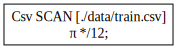

In [3]:
path = './data/train.csv'
lf = pl.scan_csv(path)
lf.show_graph()

In [4]:
lf.head().collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [5]:
lf.describe()

statistic,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
str,f64,f64,f64,str,str,f64,f64,f64,str,f64,str,str
"""count""",891.0,891.0,891.0,"""891""","""891""",714.0,891.0,891.0,"""891""",891.0,"""204""","""889"""
"""null_count""",0.0,0.0,0.0,"""0""","""0""",177.0,0.0,0.0,"""0""",0.0,"""687""","""2"""
"""mean""",446.0,0.383838,2.308642,null,null,29.699118,0.523008,0.381594,null,32.204208,null,null
"""std""",257.353842,0.486592,0.836071,null,null,14.526497,1.102743,0.806057,null,49.693429,null,null
"""min""",1.0,0.0,1.0,"""Abbing, Mr. Anthony""","""female""",0.42,0.0,0.0,"""110152""",0.0,"""A10""","""C"""
"""25%""",224.0,0.0,2.0,null,null,20.0,0.0,0.0,null,7.925,null,null
"""50%""",446.0,0.0,3.0,null,null,28.0,0.0,0.0,null,14.4542,null,null
"""75%""",669.0,1.0,3.0,null,null,38.0,1.0,0.0,null,31.0,null,null
"""max""",891.0,1.0,3.0,"""van Melkebeke, Mr. Philemon""","""male""",80.0,8.0,6.0,"""WE/P 5735""",512.3292,"""T""","""S"""


In [6]:
lf.select(cs.all().n_unique()).collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
891,2,3,891,2,89,7,7,681,248,148,4


In [7]:
lf = lf.drop('PassengerId', 'Ticket', 'Cabin', 'Name', strict=False)
lf.collect_schema()

Schema([('Survived', Int64),
        ('Pclass', Int64),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Fare', Float64),
        ('Embarked', String)])

In [8]:
lf = lf.rename({name: name.lower() for name in lf.collect_schema().names()})

In [9]:
lf.head().collect()

survived,pclass,sex,age,sibsp,parch,fare,embarked
i64,i64,str,f64,i64,i64,f64,str
0,3,"""male""",22.0,1,0,7.25,"""S"""
1,1,"""female""",38.0,1,0,71.2833,"""C"""
1,3,"""female""",26.0,0,0,7.925,"""S"""
1,1,"""female""",35.0,1,0,53.1,"""S"""
0,3,"""male""",35.0,0,0,8.05,"""S"""


In [10]:
lf = lf.with_columns(
    pl.col('survived').cast(pl.Int8),
    pl.col('pclass').cast(pl.Int8),
    pl.col('sibsp').cast(pl.Int8),
    pl.col('parch').cast(pl.Int8)
)
lf.collect_schema()

Schema([('survived', Int8),
        ('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('parch', Int8),
        ('fare', Float64),
        ('embarked', String)])

Гистограммы распределений признаков


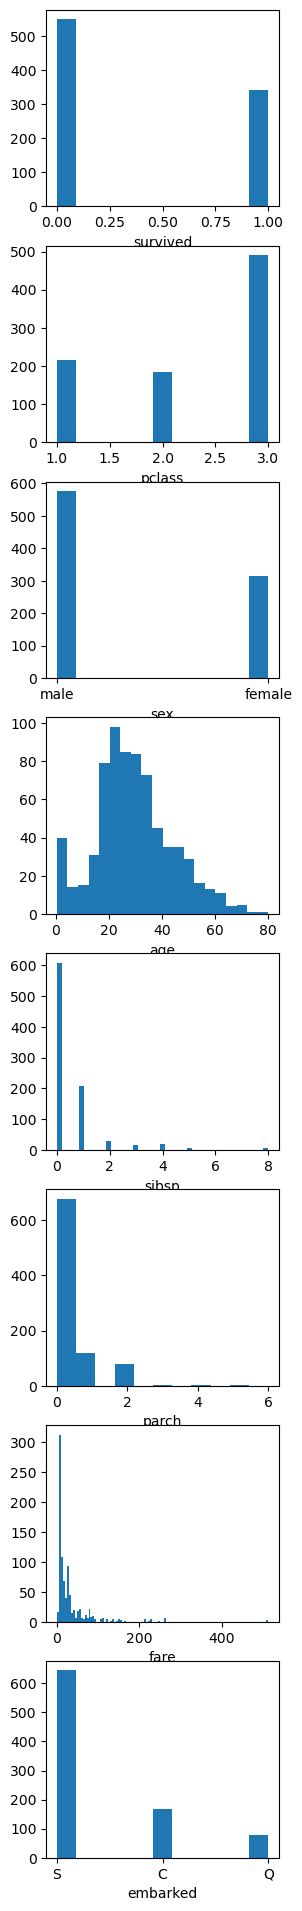

In [11]:
cols = lf.collect_schema().names()
fig, axs = plt.subplots(nrows=len(cols), figsize=(3, len(cols) * 3))
for col, ax in zip(cols, axs):
    
    ax.hist(lf.select(pl.col(col)).drop_nulls().collect(), bins='auto')
    ax.set_xlabel(col)

fig.subplots_adjust()
print('Гистограммы распределений признаков')

Гистограммы распределений признаков по категории survived


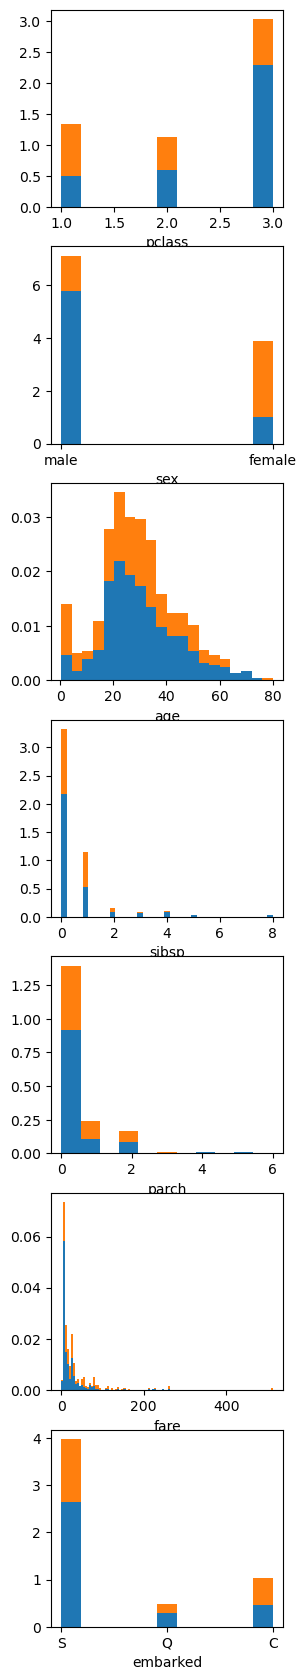

In [12]:
cols = lf.drop('survived').collect_schema().names()
fig, axs = plt.subplots(nrows=len(cols), figsize=(3, len(cols) * 3))
for col, ax in zip(cols, axs):
    ax.hist((lf.filter(pl.col('survived') == 0).select(pl.col(col)).drop_nulls().collect().to_numpy().flatten(),
            lf.filter(pl.col('survived') == 1).select(pl.col(col)).drop_nulls().collect().to_numpy().flatten()),
            bins='auto', stacked=True, density=True)
    ax.set_xlabel(col)

fig.subplots_adjust()
print('Гистограммы распределений признаков по категории survived')

Удалим выбросы при помощи IQR

Боксплоты выборосов


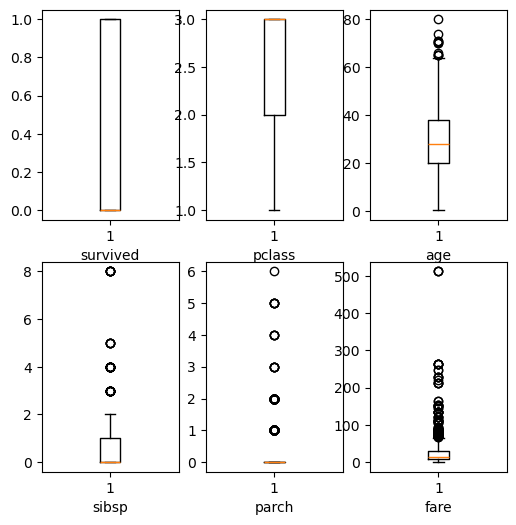

In [13]:
cols = lf.select(cs.numeric()).collect_schema().names()
fig, axs = plt.subplots(nrows=int(np.sqrt(len(cols))),
                        ncols=int(np.sqrt(len(cols))) + 1,
                        figsize=(len(cols), len(cols)))
for col, ax in zip(cols, axs.flatten()):
    ax.boxplot(lf.select(pl.col(col)).collect().drop_nulls().to_numpy().flatten())
    ax.set_xlabel(col)

fig.subplots_adjust()
print('Боксплоты выборосов')

In [14]:
lf.filter(pl.col('fare') > 400).collect()

survived,pclass,sex,age,sibsp,parch,fare,embarked
i8,i8,str,f64,i8,i8,f64,str
1,1,"""female""",35.0,0,0,512.3292,"""C"""
1,1,"""male""",36.0,0,1,512.3292,"""C"""
1,1,"""male""",35.0,0,0,512.3292,"""C"""


In [15]:
lf.filter((pl.col('sibsp') > 6) | (pl.col('parch') > 6)).collect()

survived,pclass,sex,age,sibsp,parch,fare,embarked
i8,i8,str,f64,i8,i8,f64,str
0,3,"""male""",null,8,2,69.55,"""S"""
0,3,"""female""",null,8,2,69.55,"""S"""
0,3,"""male""",null,8,2,69.55,"""S"""
0,3,"""male""",null,8,2,69.55,"""S"""
0,3,"""female""",null,8,2,69.55,"""S"""
0,3,"""male""",null,8,2,69.55,"""S"""
0,3,"""female""",null,8,2,69.55,"""S"""


In [16]:
lf.filter((pl.col('sibsp') > 3) | (pl.col('parch') > 3)).collect()

survived,pclass,sex,age,sibsp,parch,fare,embarked
i8,i8,str,f64,i8,i8,f64,str
0,3,"""male""",39.0,1,5,31.275,"""S"""
0,3,"""male""",2.0,4,1,29.125,"""Q"""
1,3,"""female""",38.0,1,5,31.3875,"""S"""
0,3,"""male""",7.0,4,1,39.6875,"""S"""
0,3,"""male""",11.0,5,2,46.9,"""S"""
…,…,…,…,…,…,…,…
0,3,"""male""",2.0,4,1,39.6875,"""S"""
0,3,"""male""",null,8,2,69.55,"""S"""
0,3,"""male""",4.0,4,2,31.275,"""S"""


In [17]:
def calc_boundaries(arr: np.ndarray) -> tuple[float, float]:
    q75 = np.quantile(arr, 0.75)
    q25 = np.quantile(arr, 0.25)
    iqr = q75 - q25
    return(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

In [18]:
lf_eda = lf.drop_nulls()

In [19]:
cols = lf_eda.select(cs.numeric()).collect_schema().names()
outliers_ratio = []
for col in cols:
    bounds = calc_boundaries(lf_eda.select(pl.col(col)).collect().to_numpy().flatten())
    outliers_count = lf_eda.filter((pl.col(col) < bounds[0]) | (pl.col(col) > bounds[1])).select(pl.count(col)).collect()
    full_count = lf_eda.select(pl.count(col)).collect()
    outliers_ratio.append(outliers_count / full_count * 100)

print('Outliers ratio')
pl.DataFrame({name: val for name, val in zip(cols, outliers_ratio)})     

Outliers ratio


survived,pclass,age,sibsp,parch,fare
f64,f64,f64,f64,f64,f64
0.0,0.0,1.123596,4.91573,2.106742,13.342697


In [20]:
def clip_outliers(s: pl.Series) -> pl.Series:
    arr = s.to_numpy()
    bounds = calc_boundaries(arr)
    return pl.Series(np.clip(arr, bounds[0], bounds[1]))

In [21]:
lf = lf.with_columns(
    cs.numeric().exclude('fare').clip(
        cs.numeric().quantile(0.25) - 1.5 * (cs.numeric().quantile(0.75) - cs.numeric().quantile(0.25)),
        cs.numeric().quantile(0.75) + 1.5 * (cs.numeric().quantile(0.75) - cs.numeric().quantile(0.25))
    ),
    pl.col('fare').clip(
        pl.col('fare').quantile(0.25) - 1.5 * (pl.col('fare').quantile(0.75) - pl.col('fare').quantile(0.25)),
        pl.col('fare').quantile(0.75) + 4 * (pl.col('fare').quantile(0.75) - pl.col('fare').quantile(0.25)),
    )
)

In [22]:
lf.collect_schema()

Schema([('survived', Int8),
        ('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('parch', Int8),
        ('fare', Float64),
        ('embarked', String)])

Боксплоты выборосов


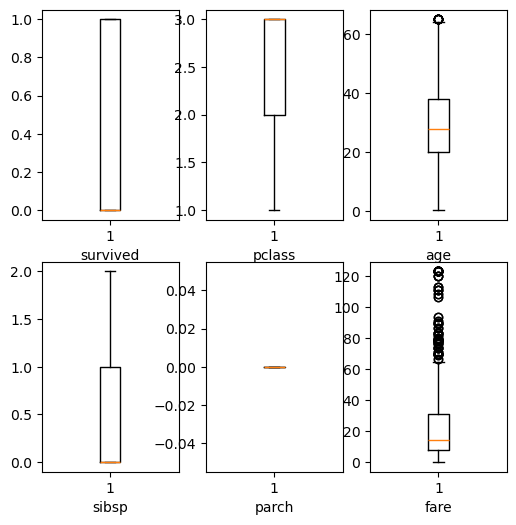

In [23]:
cols = lf.select(cs.numeric()).collect_schema().names()
fig, axs = plt.subplots(nrows=int(np.sqrt(len(cols))),
                        ncols=int(np.sqrt(len(cols))) + 1,
                        figsize=(len(cols), len(cols)))
for col, ax in zip(cols, axs.flatten()):
    ax.boxplot(lf.select(pl.col(col)).collect().drop_nulls().to_numpy().flatten())
    ax.set_xlabel(col)
fig.subplots_adjust()
print('Боксплоты выборосов')

In [24]:
lf.describe()

statistic,survived,pclass,sex,age,sibsp,parch,fare,embarked
str,f64,f64,str,f64,f64,f64,f64,str
"""count""",891.0,891.0,"""891""",714.0,891.0,891.0,891.0,"""889"""
"""null_count""",0.0,0.0,"""0""",177.0,0.0,0.0,0.0,"""2"""
"""mean""",0.383838,2.308642,null,29.625588,0.400673,0.0,28.238626,null
"""std""",0.486592,0.836071,null,14.323792,0.637727,0.0,30.773639,null
"""min""",0.0,1.0,"""female""",0.42,0.0,0.0,0.0,"""C"""
"""25%""",0.0,2.0,null,20.0,0.0,0.0,7.925,null
"""50%""",0.0,3.0,null,28.0,0.0,0.0,14.4542,null
"""75%""",1.0,3.0,null,38.0,1.0,0.0,31.0,null
"""max""",1.0,3.0,"""male""",65.0,2.0,0.0,123.3,"""S"""


In [25]:
lf = lf.drop('parch')
lf.collect_schema()

Schema([('survived', Int8),
        ('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('fare', Float64),
        ('embarked', String)])

Заполним пропуски

In [26]:
lf = lf.drop_nulls(pl.col('embarked'))

In [27]:
from sklearn.impute import KNNImputer

In [28]:
null_counts = lf.select(cs.numeric().null_count()).collect()
colls_w_nulls = [col for col in null_counts.columns if null_counts[col][0] > 0]
print(colls_w_nulls)

['age']


In [29]:
imputed_array = KNNImputer().fit_transform(lf.select(colls_w_nulls).collect().to_numpy())

In [30]:
lf = lf.collect().with_columns([
    pl.Series(name=col, values=imputed_array[:, i]) for i, col in enumerate(colls_w_nulls)
]).lazy()

In [31]:
lf.describe()

statistic,survived,pclass,sex,age,sibsp,fare,embarked
str,f64,f64,str,f64,f64,f64,str
"""count""",889.0,889.0,"""889""",889.0,889.0,889.0,"""889"""
"""null_count""",0.0,0.0,"""0""",0.0,0.0,0.0,"""0"""
"""mean""",0.382452,2.311586,null,29.568357,0.401575,28.122178,null
"""std""",0.48626,0.8347,null,12.785759,0.638161,30.709964,null
"""min""",0.0,1.0,"""female""",0.42,0.0,0.0,"""C"""
"""25%""",0.0,2.0,null,22.0,0.0,7.8958,null
"""50%""",0.0,3.0,null,29.568357,0.0,14.4542,null
"""75%""",1.0,3.0,null,35.0,1.0,31.0,null
"""max""",1.0,3.0,"""male""",65.0,2.0,123.3,"""S"""


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe = OneHotEncoder()
ohe.fit(lf.select(pl.col('pclass', 'sex', 'sibsp', 'embarked')).collect())

OneHotEncoder()

In [34]:
ohe.categories_

[array([1, 2, 3], dtype=object),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [35]:
ohe.get_feature_names_out()

array(['pclass_1', 'pclass_2', 'pclass_3', 'sex_female', 'sex_male',
       'sibsp_0', 'sibsp_1', 'sibsp_2', 'embarked_C', 'embarked_Q',
       'embarked_S'], dtype=object)

In [36]:
cols = ['pclass', 'sex', 'sibsp', 'embarked']
for col in cols:
    result = (
        lf.group_by(col, 'survived')
        .agg(pl.len().alias('count'))
        .with_columns(
            (pl.col('count') / pl.col('count').sum().over(col) * 100).alias('percent')
        )
        .sort(col, 'survived')
        .collect()
    )
    print(result)

shape: (6, 4)
┌────────┬──────────┬───────┬───────────┐
│ pclass ┆ survived ┆ count ┆ percent   │
│ ---    ┆ ---      ┆ ---   ┆ ---       │
│ i8     ┆ i8       ┆ u32   ┆ f64       │
╞════════╪══════════╪═══════╪═══════════╡
│ 1      ┆ 0        ┆ 80    ┆ 37.383178 │
│ 1      ┆ 1        ┆ 134   ┆ 62.616822 │
│ 2      ┆ 0        ┆ 97    ┆ 52.717391 │
│ 2      ┆ 1        ┆ 87    ┆ 47.282609 │
│ 3      ┆ 0        ┆ 372   ┆ 75.763747 │
│ 3      ┆ 1        ┆ 119   ┆ 24.236253 │
└────────┴──────────┴───────┴───────────┘
shape: (4, 4)
┌────────┬──────────┬───────┬───────────┐
│ sex    ┆ survived ┆ count ┆ percent   │
│ ---    ┆ ---      ┆ ---   ┆ ---       │
│ str    ┆ i8       ┆ u32   ┆ f64       │
╞════════╪══════════╪═══════╪═══════════╡
│ female ┆ 0        ┆ 81    ┆ 25.961538 │
│ female ┆ 1        ┆ 231   ┆ 74.038462 │
│ male   ┆ 0        ┆ 468   ┆ 81.109185 │
│ male   ┆ 1        ┆ 109   ┆ 18.890815 │
└────────┴──────────┴───────┴───────────┘
shape: (6, 4)
┌───────┬──────────┬───────┬──────

Составить результативный датасет (отбросив колонки Pclass_2, sex_male, sibsp_0, embarked_S) и построить по нему модель

In [37]:
res_matrix = ohe.transform(lf.select(pl.col('pclass', 'sex', 'sibsp', 'embarked')).collect())

In [38]:
res_matrix.toarray().shape

(889, 11)

In [39]:
lf_fin = lf.with_columns(
    [pl.Series(name, row, pl.Int8) for name, row in zip(ohe.get_feature_names_out(), res_matrix.toarray().T)]
)
lf_fin.head().collect()

survived,pclass,sex,age,sibsp,fare,embarked,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,embarked_C,embarked_Q,embarked_S
i8,i8,str,f64,i8,f64,str,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
0,3,"""male""",22.0,1,7.25,"""S""",0,0,1,0,1,0,1,0,0,0,1
1,1,"""female""",38.0,1,71.2833,"""C""",1,0,0,1,0,0,1,0,1,0,0
1,3,"""female""",26.0,0,7.925,"""S""",0,0,1,1,0,1,0,0,0,0,1
1,1,"""female""",35.0,1,53.1,"""S""",1,0,0,1,0,0,1,0,0,0,1
0,3,"""male""",35.0,0,8.05,"""S""",0,0,1,0,1,1,0,0,0,0,1


In [40]:
lf_fin = lf_fin.drop(pl.col('pclass', 'sex', 'sibsp', 'embarked', 'pclass_2', 'sex_male', 'sibsp_0', 'embarked_S'))
lf_fin.head().collect()

survived,age,fare,pclass_1,pclass_3,sex_female,sibsp_1,sibsp_2,embarked_C,embarked_Q
i8,f64,f64,i8,i8,i8,i8,i8,i8,i8
0,22.0,7.25,0,1,0,1,0,0,0
1,38.0,71.2833,1,0,1,1,0,1,0
1,26.0,7.925,0,1,1,0,0,0,0
1,35.0,53.1,1,0,1,1,0,0,0
0,35.0,8.05,0,1,0,0,0,0,0


In [41]:
lf_fin.describe()

statistic,survived,age,fare,pclass_1,pclass_3,sex_female,sibsp_1,sibsp_2,embarked_C,embarked_Q
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0,889.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.382452,29.568357,28.122178,0.24072,0.552306,0.350956,0.235096,0.08324,0.188976,0.086614
"""std""",0.48626,12.785759,30.709964,0.427761,0.497536,0.477538,0.424297,0.2764,0.39171,0.281427
"""min""",0.0,0.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.0,22.0,7.8958,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",0.0,29.568357,14.4542,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"""75%""",1.0,35.0,31.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
"""max""",1.0,65.0,123.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
np.save('./data/train.npy', lf_fin.collect().to_numpy())
np.save('./data/features.npy', np.array(lf_fin.collect_schema().names()))

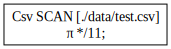

In [43]:
path = './data/test.csv'
lf = pl.scan_csv(path)
lf.show_graph()

In [44]:
lf = lf.drop('PassengerId', 'Ticket', 'Cabin', 'Name', strict=False)
lf.collect_schema()

Schema([('Pclass', Int64),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Fare', Float64),
        ('Embarked', String)])

In [45]:
lf = lf.rename({name: name.lower() for name in lf.collect_schema().names()})

In [46]:
lf = lf.with_columns(
    # pl.col('survived').cast(pl.Int8),
    pl.col('pclass').cast(pl.Int8),
    pl.col('sibsp').cast(pl.Int8),
    pl.col('parch').cast(pl.Int8)
)
lf.collect_schema()

Schema([('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('parch', Int8),
        ('fare', Float64),
        ('embarked', String)])

Удалим выбросы при помощи IQR

In [47]:
def calc_boundaries(arr: np.ndarray) -> tuple[float, float]:
    q75 = np.quantile(arr, 0.75)
    q25 = np.quantile(arr, 0.25)
    iqr = q75 - q25
    return(q25 - 1.5 * iqr, q75 + 1.5 * iqr)

In [48]:
lf_eda = lf.drop_nulls()

In [49]:
def clip_outliers(s: pl.Series) -> pl.Series:
    arr = s.to_numpy()
    bounds = calc_boundaries(arr)
    return pl.Series(np.clip(arr, bounds[0], bounds[1]))

In [50]:
lf = lf.with_columns(
    cs.numeric().exclude('fare').clip(
        cs.numeric().quantile(0.25) - 1.5 * (cs.numeric().quantile(0.75) - cs.numeric().quantile(0.25)),
        cs.numeric().quantile(0.75) + 1.5 * (cs.numeric().quantile(0.75) - cs.numeric().quantile(0.25))
    ),
    pl.col('fare').clip(
        pl.col('fare').quantile(0.25) - 1.5 * (pl.col('fare').quantile(0.75) - pl.col('fare').quantile(0.25)),
        pl.col('fare').quantile(0.75) + 4 * (pl.col('fare').quantile(0.75) - pl.col('fare').quantile(0.25)),
    )
)

In [51]:
lf.collect_schema()

Schema([('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('parch', Int8),
        ('fare', Float64),
        ('embarked', String)])

In [52]:
lf = lf.drop('parch')
lf.collect_schema()

Schema([('pclass', Int8),
        ('sex', String),
        ('age', Float64),
        ('sibsp', Int8),
        ('fare', Float64),
        ('embarked', String)])

Заполним пропуски

In [53]:
lf = lf.drop_nulls(pl.col('embarked'))

In [54]:
from sklearn.impute import KNNImputer

In [55]:
null_counts = lf.select(cs.numeric().null_count()).collect()
colls_w_nulls = [col for col in null_counts.columns if null_counts[col][0] > 0]
print(colls_w_nulls)

['age', 'fare']


In [56]:
imputed_array = KNNImputer().fit_transform(lf.select(colls_w_nulls).collect().to_numpy())

In [57]:
lf = lf.collect().with_columns([
    pl.Series(name=col, values=imputed_array[:, i]) for i, col in enumerate(colls_w_nulls)
]).lazy()

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()
ohe.fit(lf.select(pl.col('pclass', 'sex', 'sibsp', 'embarked')).collect())

OneHotEncoder()

Составить результативный датасет (отбросив колонки Pclass_2, sex_male, sibsp_0, embarked_S) и построить по нему модель

In [60]:
res_matrix = ohe.transform(lf.select(pl.col('pclass', 'sex', 'sibsp', 'embarked')).collect())

In [61]:
res_matrix.toarray().shape

(418, 11)

In [62]:
lf_fin = lf.with_columns(
    [pl.Series(name, row, pl.Int8) for name, row in zip(ohe.get_feature_names_out(), res_matrix.toarray().T)]
)

In [63]:
lf_fin = lf_fin.drop(pl.col('pclass', 'sex', 'sibsp', 'embarked', 'pclass_2', 'sex_male', 'sibsp_0', 'embarked_S'))
lf_fin.head().collect()

age,fare,pclass_1,pclass_3,sex_female,sibsp_1,sibsp_2,embarked_C,embarked_Q
f64,f64,i8,i8,i8,i8,i8,i8,i8
34.5,7.8292,0,1,0,0,0,0,1
47.0,7.0,0,1,1,1,0,0,0
62.0,9.6875,0,0,0,0,0,0,1
27.0,8.6625,0,1,0,0,0,0,0
22.0,12.2875,0,1,1,1,0,0,0


In [64]:
lf_fin.describe()

statistic,age,fare,pclass_1,pclass_3,sex_female,sibsp_1,sibsp_2,embarked_C,embarked_Q
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",29.62567,29.764232,0.255981,0.521531,0.363636,0.263158,0.059809,0.244019,0.110048
"""std""",12.826393,33.334709,0.436934,0.500135,0.481622,0.440875,0.237416,0.430019,0.313324
"""min""",0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",22.0,7.8958,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",27.0,14.4542,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"""75%""",36.0,31.5,1.0,1.0,1.0,1.0,0.0,0.0,0.0
"""max""",66.0,125.9168,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [65]:
np.save('./data/test.npy', lf_fin.collect().to_numpy())